**Importing all Required Libraries**

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import plot_tree 

%matplotlib inline

**Reading Datasets**

In [136]:
caravan=pd.read_csv('Caravan.csv')
email=pd.read_csv('Emails.csv')
diabetes = pd.read_csv('Diabetes.csv')

# Task1

In [137]:
caravan.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


In [138]:
caravan.drop(columns=caravan.columns[0], axis=1,  inplace=True)
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [139]:
caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [140]:
caravan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOSTYPE   5822 non-null   int64 
 1   MAANTHUI  5822 non-null   int64 
 2   MGEMOMV   5822 non-null   int64 
 3   MGEMLEEF  5822 non-null   int64 
 4   MOSHOOFD  5822 non-null   int64 
 5   MGODRK    5822 non-null   int64 
 6   MGODPR    5822 non-null   int64 
 7   MGODOV    5822 non-null   int64 
 8   MGODGE    5822 non-null   int64 
 9   MRELGE    5822 non-null   int64 
 10  MRELSA    5822 non-null   int64 
 11  MRELOV    5822 non-null   int64 
 12  MFALLEEN  5822 non-null   int64 
 13  MFGEKIND  5822 non-null   int64 
 14  MFWEKIND  5822 non-null   int64 
 15  MOPLHOOG  5822 non-null   int64 
 16  MOPLMIDD  5822 non-null   int64 
 17  MOPLLAAG  5822 non-null   int64 
 18  MBERHOOG  5822 non-null   int64 
 19  MBERZELF  5822 non-null   int64 
 20  MBERBOER  5822 non-null   int64 
 21  MBERMIDD  5822

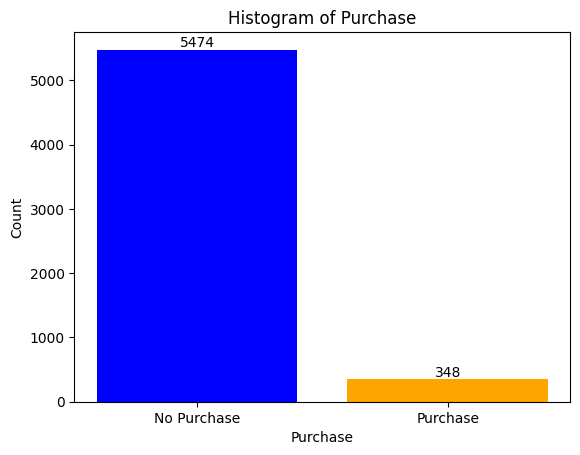

In [141]:
caravan['Purchase'].value_counts()
purchase_counts = caravan['Purchase'].value_counts()

# Plotting the histogram
plt.bar(purchase_counts.index, purchase_counts.values, color=['blue', 'orange'])
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.title('Histogram of Purchase')
for i, count in enumerate(purchase_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(purchase_counts.index, ['No Purchase', 'Purchase'])
plt.show()

**Label Encoding of Column 'Purchase'**

In [142]:
caravan = caravan.replace({'Purchase': {'Yes': 1,
                                'No': 0}})
caravan['Purchase'].value_counts()

Purchase
0    5474
1     348
Name: count, dtype: int64

# Imp thing to note only 348(6%) actually purchase insurance 

In [143]:
caravan.isnull().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
Purchase    0
Length: 86, dtype: int64

*The data does not contain any null value*

In [144]:
caravan.duplicated().sum()

602

**602 Rows are duplicate**

In [145]:
caravan.drop_duplicates(inplace=True)
caravan.duplicated().sum()

0

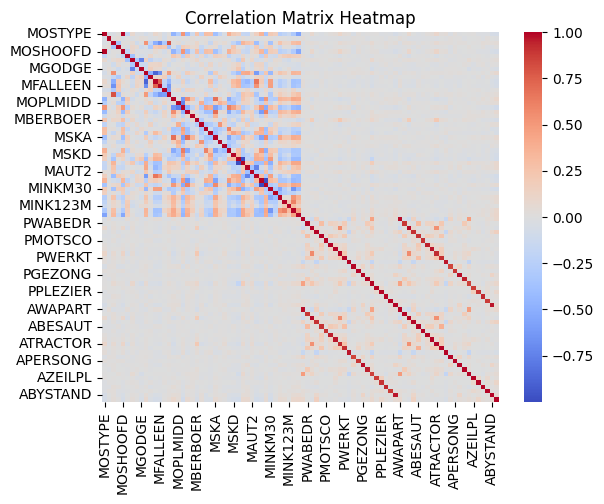

<Figure size 20000x20000 with 0 Axes>

In [146]:
# Calculate the correlation matrix
correlation_matrix = caravan.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.figure(figsize=(200, 200))
plt.show()

**Since there are 86 columns, its very difficult to find correlation among columns**

In [147]:
# We check for all the columns with their data type and unique values
list(zip(caravan.columns,caravan.dtypes,caravan.nunique()))

[('MOSTYPE', dtype('int64'), 40),
 ('MAANTHUI', dtype('int64'), 9),
 ('MGEMOMV', dtype('int64'), 5),
 ('MGEMLEEF', dtype('int64'), 6),
 ('MOSHOOFD', dtype('int64'), 10),
 ('MGODRK', dtype('int64'), 10),
 ('MGODPR', dtype('int64'), 10),
 ('MGODOV', dtype('int64'), 6),
 ('MGODGE', dtype('int64'), 10),
 ('MRELGE', dtype('int64'), 10),
 ('MRELSA', dtype('int64'), 8),
 ('MRELOV', dtype('int64'), 10),
 ('MFALLEEN', dtype('int64'), 10),
 ('MFGEKIND', dtype('int64'), 10),
 ('MFWEKIND', dtype('int64'), 10),
 ('MOPLHOOG', dtype('int64'), 10),
 ('MOPLMIDD', dtype('int64'), 10),
 ('MOPLLAAG', dtype('int64'), 10),
 ('MBERHOOG', dtype('int64'), 10),
 ('MBERZELF', dtype('int64'), 6),
 ('MBERBOER', dtype('int64'), 10),
 ('MBERMIDD', dtype('int64'), 10),
 ('MBERARBG', dtype('int64'), 10),
 ('MBERARBO', dtype('int64'), 10),
 ('MSKA', dtype('int64'), 10),
 ('MSKB1', dtype('int64'), 10),
 ('MSKB2', dtype('int64'), 10),
 ('MSKC', dtype('int64'), 10),
 ('MSKD', dtype('int64'), 9),
 ('MHHUUR', dtype('int64')

**Feature Scaling is not required**

In [148]:
# Set the threshold for high correlation
threshold = 0.95
# Identify variables with high correlation
high_correlation_pairs = []
# Loop through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

# Print the pairs with high correlation
print("Pairs with correlation coefficient > {} or < -{}:".format(threshold, threshold))
for pair in high_correlation_pairs:
    variable1, variable2 = pair
    correlation_coefficient = correlation_matrix.loc[variable1, variable2]
    print(f"{variable1} and {variable2}: {correlation_coefficient}")

Pairs with correlation coefficient > 0.95 or < -0.95:
MOSTYPE and MOSHOOFD: 0.992800833204681
MHHUUR and MHKOOP: -0.9995293629711888
MZFONDS and MZPART: -0.9992024919777364
PWAPART and AWAPART: 0.9797984503013709
PWALAND and AWALAND: 0.9875489586539745
PAANHANG and AAANHANG: 0.966042123514599
PBROM and ABROM: 0.9676069919051014
PGEZONG and AGEZONG: 0.9799537763066927
PBYSTAND and ABYSTAND: 0.9661852016005502


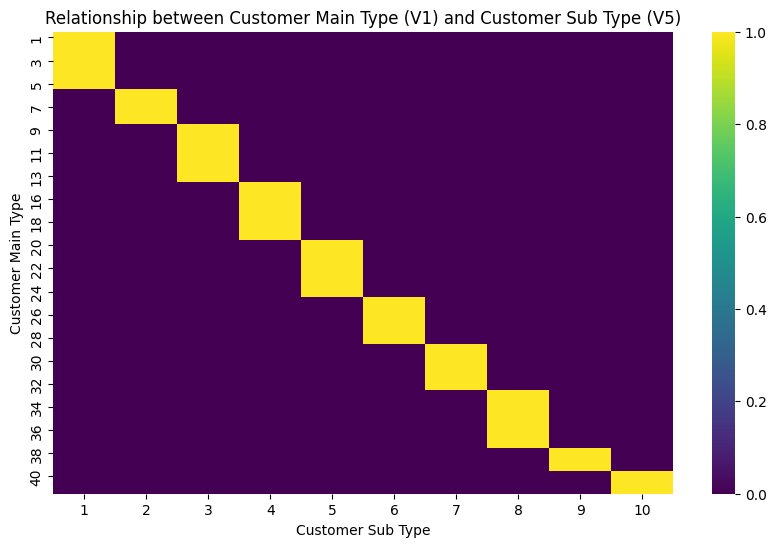

In [149]:
cross_tab = pd.crosstab(caravan['MOSTYPE'], caravan['MOSHOOFD'])
normalized_cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_cross_tab, annot=False, cmap='viridis', cbar=True)
plt.title('Relationship between Customer Main Type (V1) and Customer Sub Type (V5)')
plt.xlabel('Customer Sub Type')
plt.ylabel('Customer Main Type')
plt.show()


In [150]:
caravan['MOSTYPE'].value_counts()

MOSTYPE
33    687
8     315
38    302
39    296
3     239
9     234
23    219
36    210
35    186
41    185
31    175
24    159
13    158
10    157
34    148
11    140
32    128
37    128
1     117
30    111
6     110
12     99
22     89
25     80
29     80
2      71
40     66
4      49
26     46
5      43
27     42
7      42
20     24
28     22
18     19
16     16
21     14
17      8
15      3
19      3
Name: count, dtype: int64

In [151]:
target = caravan['Purchase'] #y
features = caravan.drop(['Purchase'], axis=1) #X

Text(0, 0.5, 'Caravan or not')

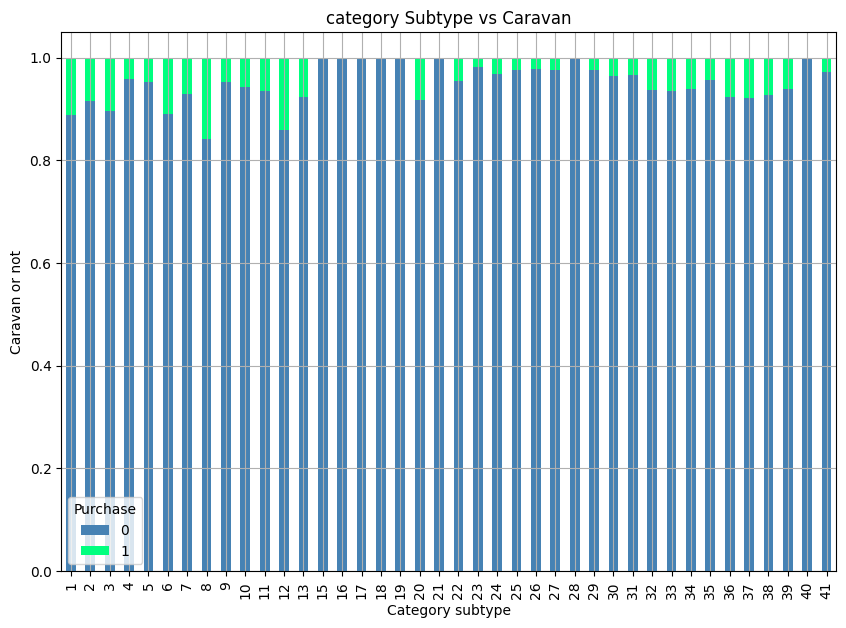

In [152]:
categorysubtype_caravan = pd.crosstab(features['MOSTYPE'], target)
categorysubtype_caravan_pct = categorysubtype_caravan.div(categorysubtype_caravan.sum(1).astype(float), axis=0)
categorysubtype_caravan_pct.plot(figsize= (10,7), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='category Subtype vs Caravan', grid=True)
plt.xlabel('Category subtype')
plt.ylabel('Caravan or not')

Text(0, 0.5, 'count')

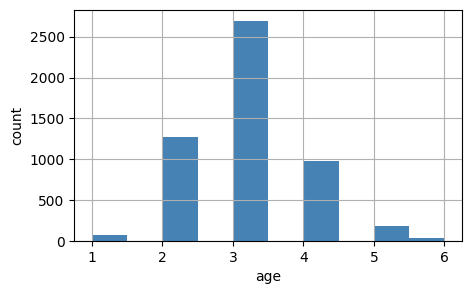

In [153]:
features['MGEMLEEF'].hist(figsize=(5,3), fc='steelblue', grid=True)
plt.xlabel('age')
plt.ylabel('count')

Text(0, 0.5, 'Caravan')

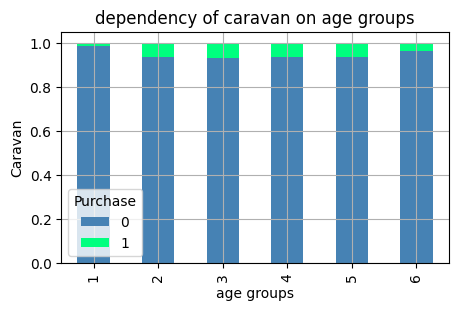

In [154]:
age_caravan = pd.crosstab(features['MGEMLEEF'], target)
age_caravan_pct = age_caravan.div(age_caravan.sum(1).astype(float),axis=0)
age_caravan_pct.plot(figsize=(5,3), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='dependency of caravan on age groups', grid=True)
plt.xlabel('age groups')
plt.ylabel('Caravan')

Text(0, 0.5, 'count')

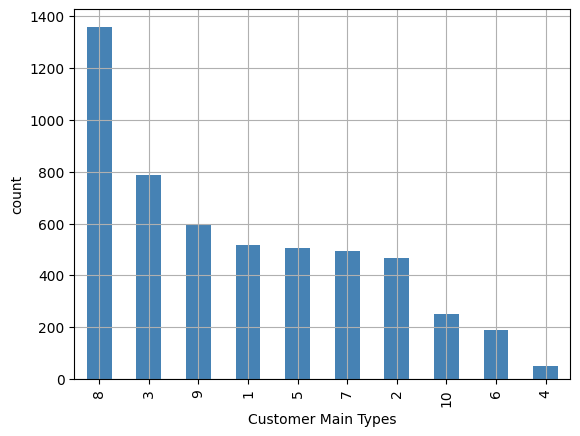

In [155]:
features['MOSHOOFD'].value_counts().plot(kind='bar', color='steelblue', grid=True)
plt.xlabel('Customer Main Types')
plt.ylabel('count')

Text(0, 0.5, 'caravan')

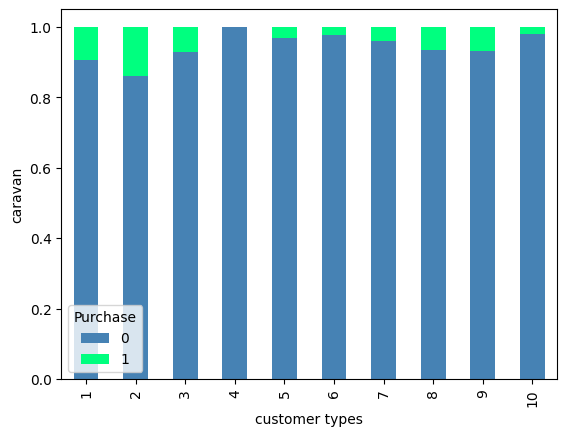

In [156]:
cust_type_caravan = pd.crosstab(features['MOSHOOFD'], target)
cust_type_caravan_pct = cust_type_caravan.div(cust_type_caravan.sum(1).astype(float), axis=0)
cust_type_caravan_pct.plot(kind='bar', stacked=True, color = ['steelblue', 'springgreen'])
plt.xlabel('customer types')
plt.ylabel('caravan')

# Model TRAINING

In [157]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [158]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4176, 85) (4176,)
(1044, 85) (1044,)


In [159]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [162]:
logreg = LogisticRegression(max_iter=1000,random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [163]:
y_pred_logreg_train=logreg.predict(X_train_scaled)
y_pred_logreg = logreg.predict(X_test_scaled)

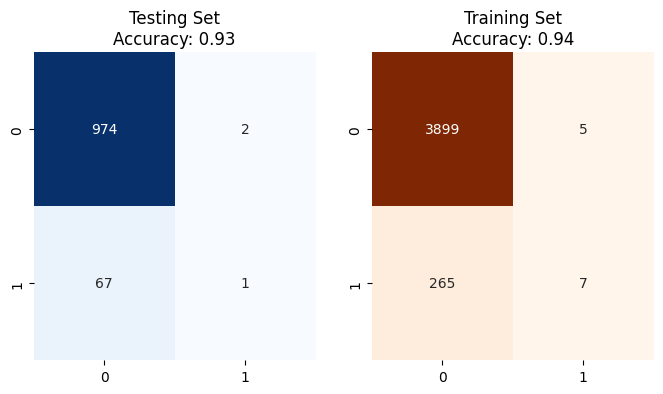


Classification Report - Testing Set:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       976
           1       0.33      0.01      0.03        68

    accuracy                           0.93      1044
   macro avg       0.63      0.51      0.50      1044
weighted avg       0.90      0.93      0.90      1044


Classification Report - Training Set:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3904
           1       0.58      0.03      0.05       272

    accuracy                           0.94      4176
   macro avg       0.76      0.51      0.51      4176
weighted avg       0.91      0.94      0.91      4176



In [164]:
# On Testing set
acc_test = accuracy_score(y_test, y_pred_logreg)
conf_matrix_test = confusion_matrix(y_test, y_pred_logreg)

# On Training set
acc_train = accuracy_score(y_train, y_pred_logreg_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_logreg_train)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot testing set confusion matrix
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title(f'Testing Set\nAccuracy: {acc_test:.2f}')

# Plot training set confusion matrix
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axes[1])
axes[1].set_title(f'Training Set\nAccuracy: {acc_train:.2f}')

plt.show()

# Display classification report
print("\nClassification Report - Testing Set:\n")
print(classification_report(y_test, y_pred_logreg))
print("\nClassification Report - Training Set:\n")
print(classification_report(y_train, y_pred_logreg_train))

**LDA**

In [165]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Predictions
y_pred_lda_train=lda.predict(X_train_scaled)
y_pred_lda = lda.predict(X_test_scaled)

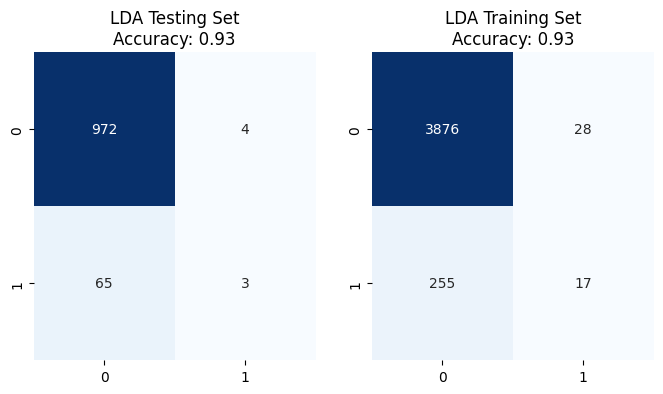


Classification Report - LDA Testing Set:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       976
           1       0.43      0.04      0.08        68

    accuracy                           0.93      1044
   macro avg       0.68      0.52      0.52      1044
weighted avg       0.90      0.93      0.91      1044


Classification Report - LDA Training Set:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3904
           1       0.38      0.06      0.11       272

    accuracy                           0.93      4176
   macro avg       0.66      0.53      0.54      4176
weighted avg       0.90      0.93      0.91      4176



In [166]:
# On Testing set
acc_test_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_test_lda = confusion_matrix(y_test, y_pred_lda)

# On Training set
acc_train_lda = accuracy_score(y_train, y_pred_lda_train)
conf_matrix_train_lda = confusion_matrix(y_train, y_pred_lda_train)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot testing set confusion matrix for LDA
sns.heatmap(conf_matrix_test_lda, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title(f'LDA Testing Set\nAccuracy: {acc_test_lda:.2f}')

# Plot training set confusion matrix for LDA
sns.heatmap(conf_matrix_train_lda, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title(f'LDA Training Set\nAccuracy: {acc_train_lda:.2f}')

plt.show()

# Display classification report for LDA
print("\nClassification Report - LDA Testing Set:\n")
print(classification_report(y_test, y_pred_lda))
print("\nClassification Report - LDA Training Set:\n")
print(classification_report(y_train, y_pred_lda_train))

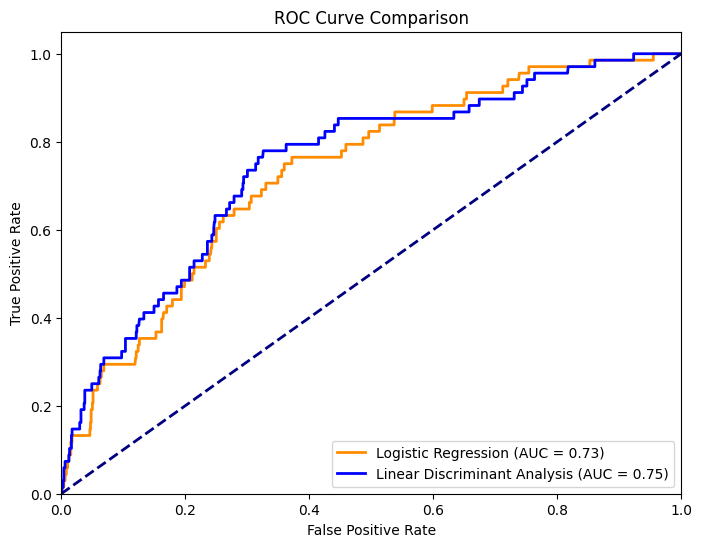

In [167]:

# ROC Curve Plotting Function
def plot_roc_curve(y_true, y_probs1, y_probs2, model_name1, model_name2):
    fpr1, tpr1, thresholds1 = roc_curve(y_true, y_probs1)
    roc_auc1 = auc(fpr1, tpr1)

    fpr2, tpr2, thresholds2 = roc_curve(y_true, y_probs2)
    roc_auc2 = auc(fpr2, tpr2)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'{model_name1} (AUC = {roc_auc1:.2f})')
    plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'{model_name2} (AUC = {roc_auc2:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc="lower right")
    plt.show()

# Assuming logreg and lda are already trained models
plot_roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1], lda.predict_proba(X_test_scaled)[:, 1], 'Logistic Regression', 'Linear Discriminant Analysis')


# Task 2

In [170]:
email.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [171]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [172]:
email.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [173]:
email.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

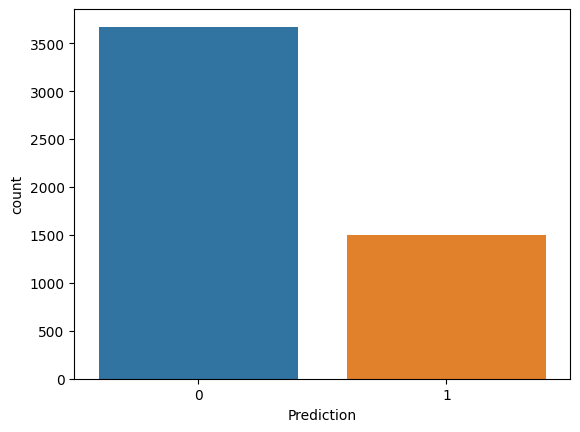

In [174]:
sns.countplot(data = email, x = "Prediction")
plt.show()

In [175]:
df = email.iloc[:, 1:]
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [176]:
df.duplicated().sum()

541

In [177]:
df = df.drop_duplicates(keep = 'first')

In [178]:
df.duplicated().sum()

0

## As there are a lot of features we are choosing 2000 best features(Optional)

In [179]:
X = df.drop(["Prediction"], axis=1)  # Exclude spam columns
y = df["Prediction"]

In [180]:
# Perform feature selection using mutual information
# selector = SelectKBest(score_func=mutual_info_classif, k=2000)  # Select top 2000 features
# X_selected = selector.fit_transform(X, y)

# # Get the selected feature names
# selected_feature_names = X.columns[selector.get_support()].tolist()

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Model Training**

**Decision Tree**

In [194]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_test_pred_dt = dt_clf.predict(X_test)
train_accuracy_dt = accuracy_score(y_train, dt_clf.predict(X_train))
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

**LDA**

In [195]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
y_test_pred_lda = lda_clf.predict(X_test)
train_accuracy_lda = accuracy_score(y_train, lda_clf.predict(X_train))
test_accuracy_lda = accuracy_score(y_test, y_test_pred_lda)

**KNN**

In [196]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_test_pred_knn = knn_clf.predict(X_test)
train_accuracy_knn = accuracy_score(y_train, knn_clf.predict(X_train))
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

In [197]:
# Confusion matrices for each classifier
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
cm_lda = confusion_matrix(y_test, y_test_pred_lda)


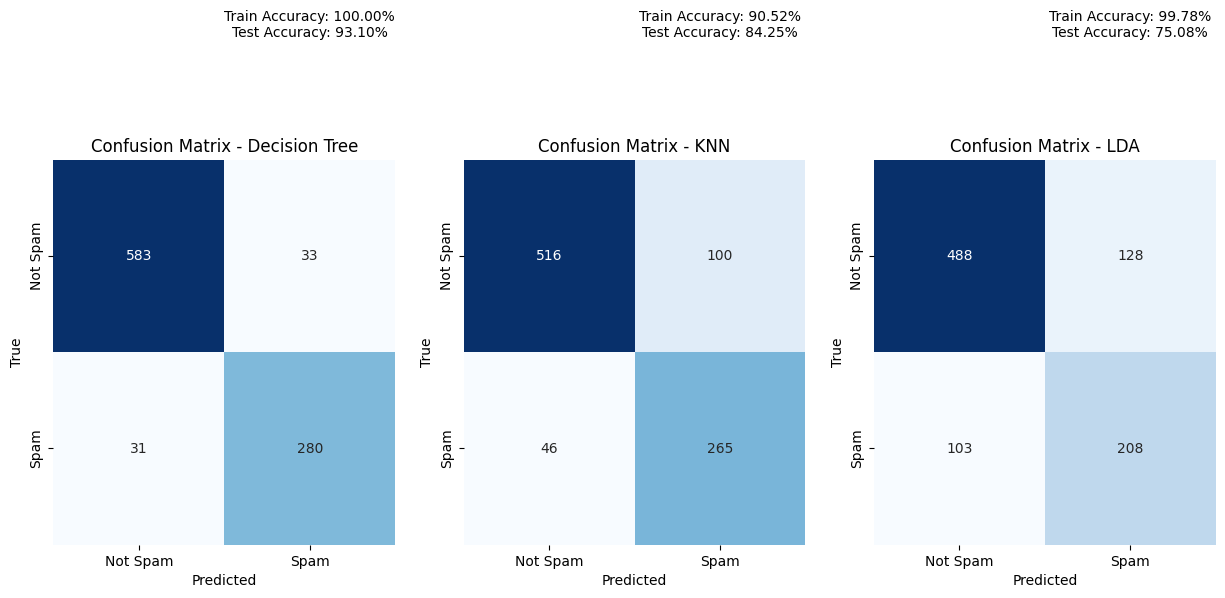

In [198]:

plt.figure(figsize=(15, 5))

# Subplot 1 - Decision Tree
plt.subplot(1, 3, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.text(1.5, -0.7, f'Train Accuracy: {train_accuracy_dt:.2%}\nTest Accuracy: {test_accuracy_dt:.2%}', ha='center', va='center')

# Subplot 2 - KNN
plt.subplot(1, 3, 2)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.text(1.5, -0.7, f'Train Accuracy: {train_accuracy_knn:.2%}\nTest Accuracy: {test_accuracy_knn:.2%}', ha='center', va='center')

# Subplot 3 - LDA
plt.subplot(1, 3, 3)
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - LDA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.text(1.5, -0.7, f'Train Accuracy: {train_accuracy_lda:.2%}\nTest Accuracy: {test_accuracy_lda:.2%}', ha='center', va='center')

plt.show()


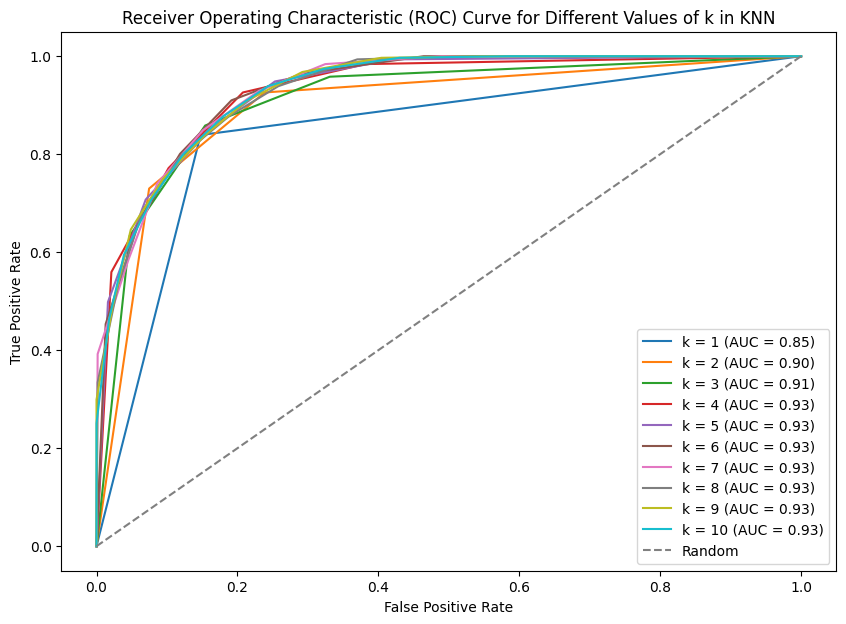

Best k for KNN: 7 with AUC: 0.93


In [202]:

# Different values of k to try
k_values = range(1, 11)
auc_values = []

# Plot ROC curves for different values of k
plt.figure(figsize=(10, 7))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)

    # Plot ROC curve for each k
    plt.plot(fpr, tpr, label=f'k = {k} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Different Values of k in KNN')
plt.legend()
plt.show()

# Find the best k based on the highest AUC
best_k_index = np.argmax(auc_values)
best_k = k_values[best_k_index]
best_auc = auc_values[best_k_index]

print(f'Best k for KNN: {best_k} with AUC: {best_auc:.2f}')


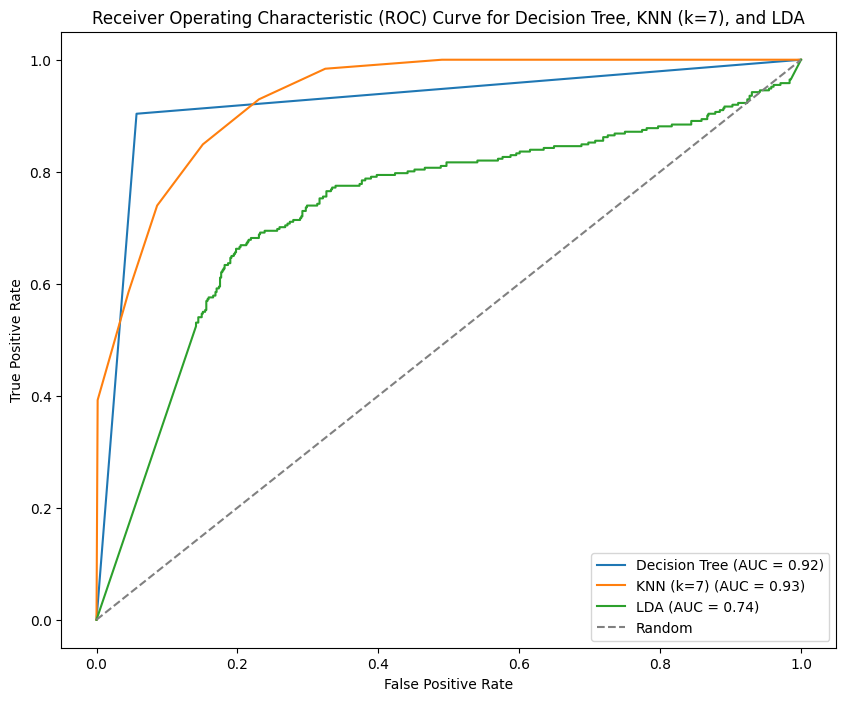

In [204]:
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_probs_dt = dt_clf.predict_proba(X_test)[:, 1]

# KNN with k=7
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)
y_probs_knn = knn_clf.predict_proba(X_test)[:, 1]

# LDA
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
y_probs_lda = lda_clf.predict_proba(X_test)[:, 1]

# Plot ROC curves and calculate AUC
plt.figure(figsize=(10, 8))

# Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# KNN with k=7
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (k=7) (AUC = {roc_auc_knn:.2f})')

# LDA
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_probs_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {roc_auc_lda:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree, KNN (k=7), and LDA')
plt.legend()
plt.show()


the            int64
to             int64
ect            int64
and            int64
for            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction    object
Length: 3001, dtype: object


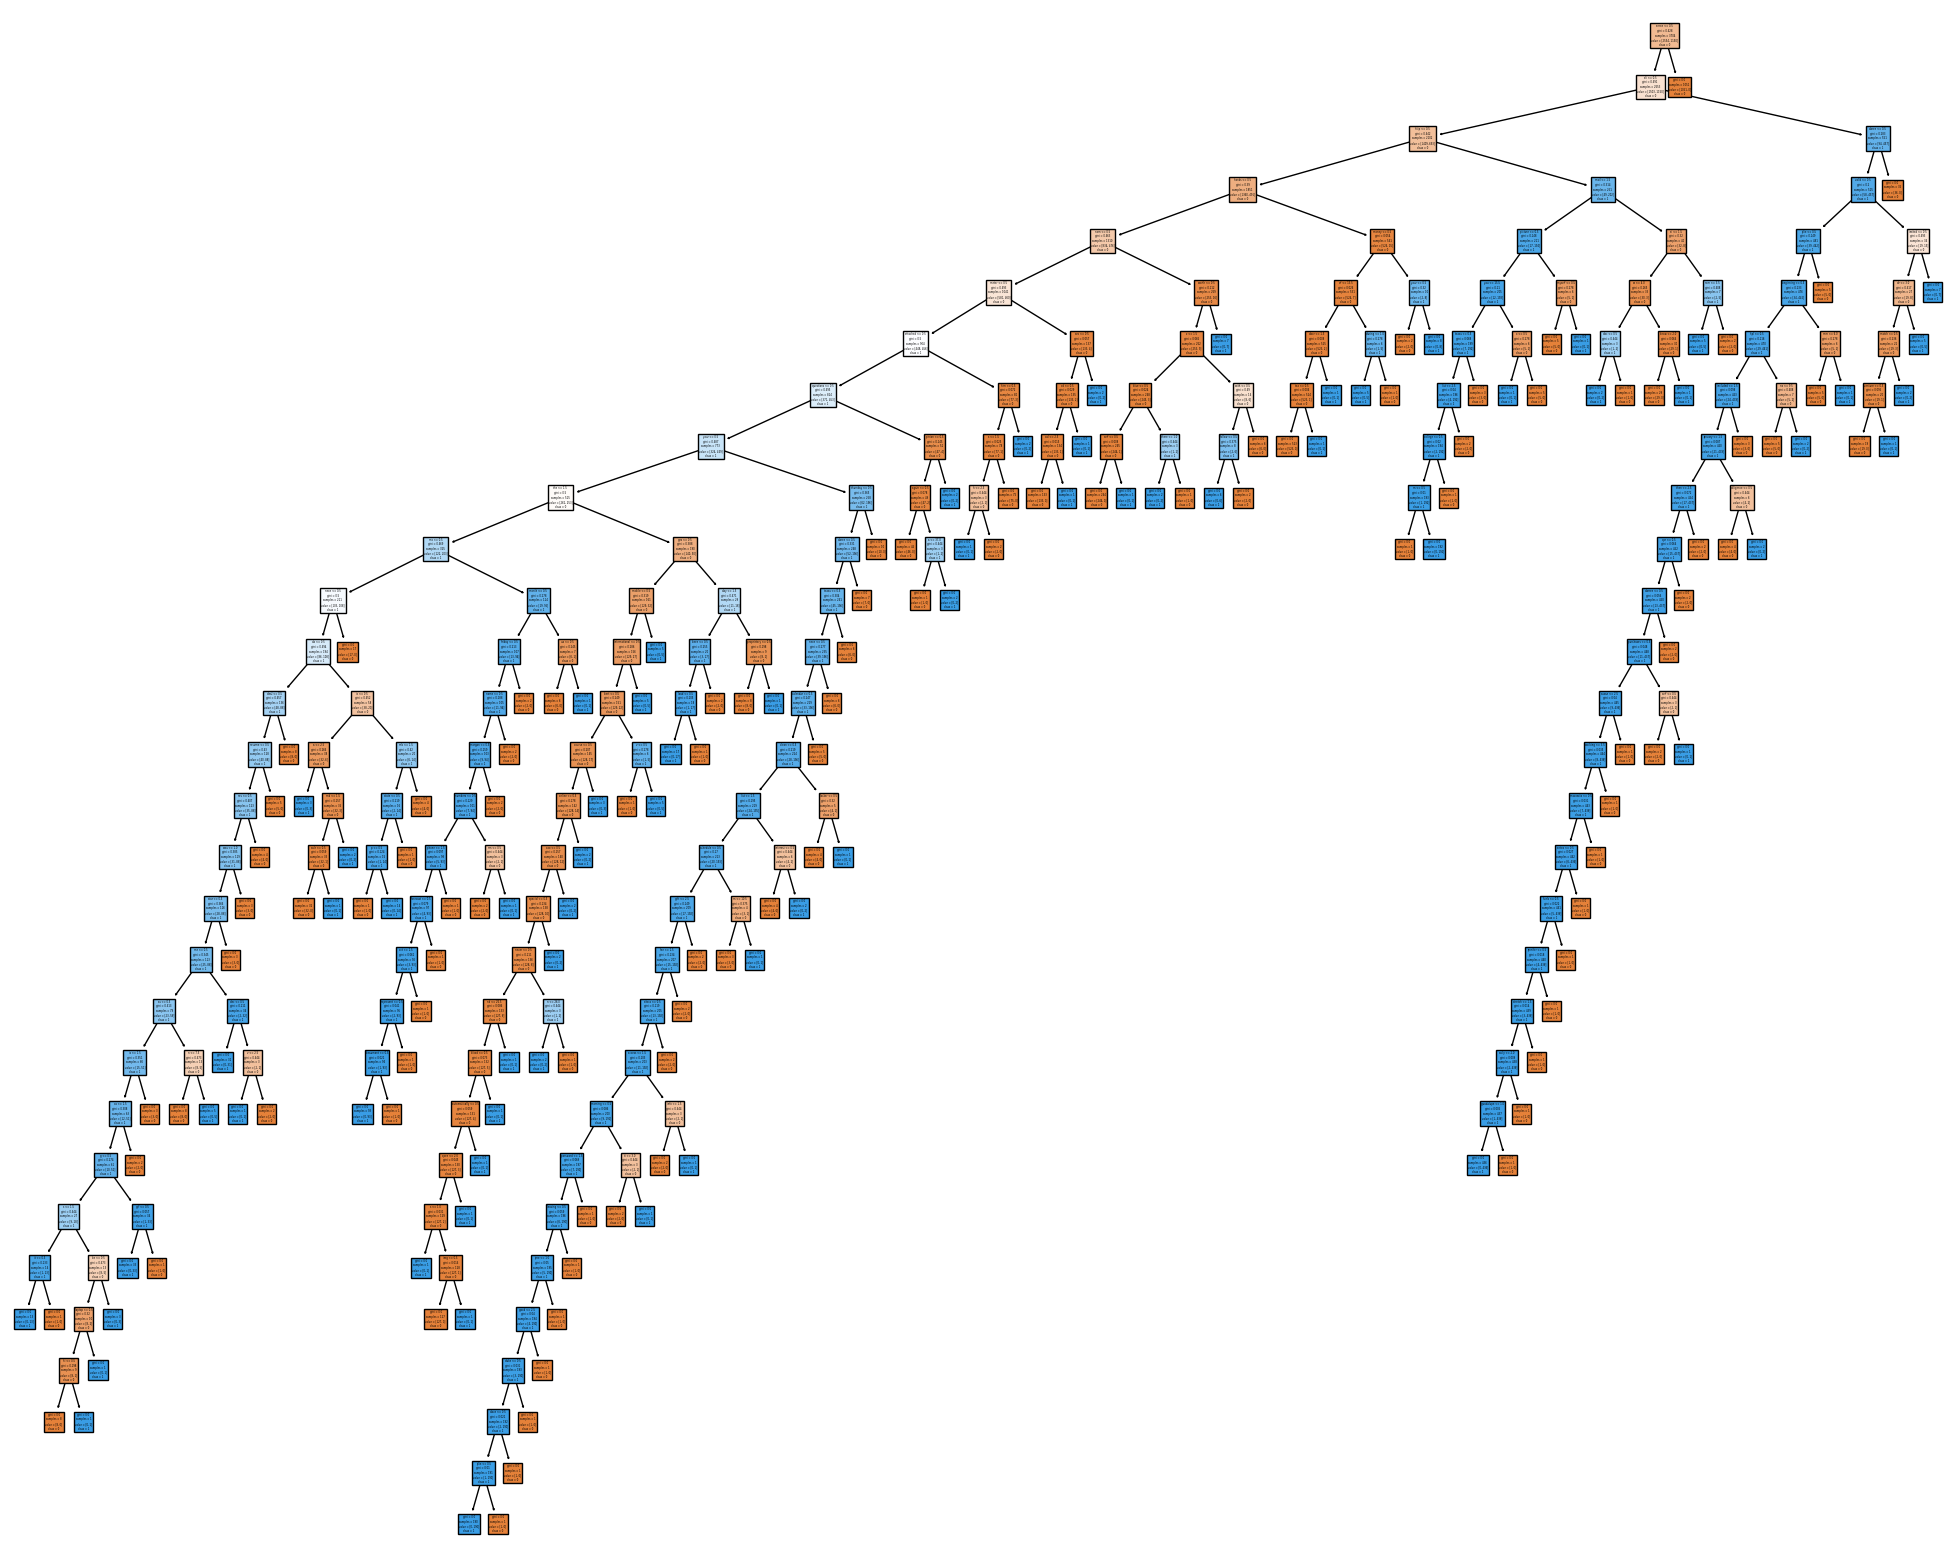

In [183]:
feature_names = df.columns[0:3000]
viz = df.copy()
viz["Prediction"]=viz["Prediction"].values.astype(str)
print(viz.dtypes)
target_names = viz['Prediction'].unique().tolist()

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

# Task3

In [205]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [206]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

There is not a single NULL value Present

In [207]:
diabetes.describe(include='all')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [208]:
diabetes.shape

(253680, 22)

In [209]:
diabetes.duplicated().sum()

23899

In [210]:
diabetes = diabetes.drop_duplicates()
diabetes.duplicated().sum()

0

In [211]:
diabetes.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

# Outliers in BMI

805

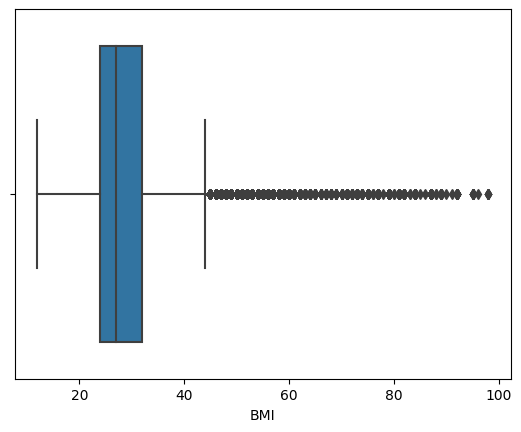

In [212]:
sns.boxplot(x = diabetes["BMI"])
(diabetes["BMI"] > 60).sum()

In [213]:
Q1 = diabetes.BMI.quantile(0.25)
Q3 = diabetes.BMI.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print("Upper: ",upper)
print("Lower: ",lower)
diabetes.loc[diabetes["BMI"] > upper,"BMI"] = upper


Upper:  44.0
Lower:  12.0


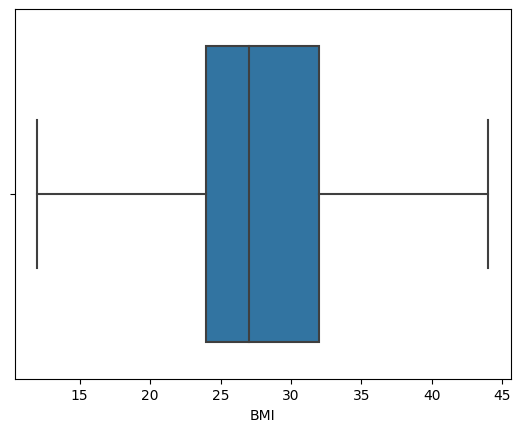

In [214]:
sns.boxplot(x = diabetes["BMI"]);

# Feature Engineering 
**Making BMI a categorical features**

In [215]:
NewBMI = pd.Series([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype="float")
diabetes["NewBMI"] = NewBMI

# Update "NewBMI" column based on BMI values
diabetes.loc[diabetes["BMI"] < 18.5, "NewBMI"] = NewBMI[0] #Under Weight category
diabetes.loc[(diabetes["BMI"] > 18.5) & (diabetes["BMI"] <= 24.9), "NewBMI"] = NewBMI[1] # Normal category 
diabetes.loc[(diabetes["BMI"] > 24.9) & (diabetes["BMI"] <= 29.9), "NewBMI"] = NewBMI[2] # Overweight category 
diabetes.loc[(diabetes["BMI"] > 29.9) & (diabetes["BMI"] <= 34.9), "NewBMI"] = NewBMI[3] # Obese-1 category 
diabetes.loc[(diabetes["BMI"] > 34.9) & (diabetes["BMI"] <= 39.9), "NewBMI"] = NewBMI[4] # Obese-2 category 
diabetes.loc[diabetes["BMI"] > 39.9, "NewBMI"] = NewBMI[5] # Obese-3 category 

# Convert the "NewBMI" column to float type
diabetes["NewBMI"] = diabetes["NewBMI"].astype(float)
diabetes = diabetes.drop("BMI", axis=1)


In [216]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,NewBMI
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,6.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,3.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,3.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,3.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,2.0


In [217]:
diabetes.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
NewBMI                   6
dtype: int64

In [218]:
diabetes["Diabetes_012"].value_counts()*100/len(diabetes)

Diabetes_012
0.0    82.711364
2.0    15.274109
1.0     2.014527
Name: count, dtype: float64

In [219]:
diabetes.Diabetes_012.value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

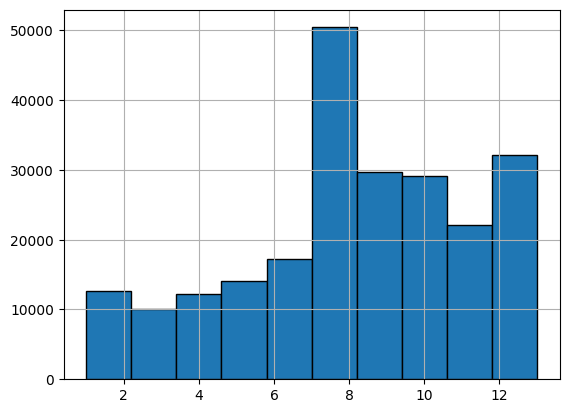

In [220]:
diabetes["Age"].hist(edgecolor = "black");

<Axes: xlabel='NewBMI', ylabel='Count'>

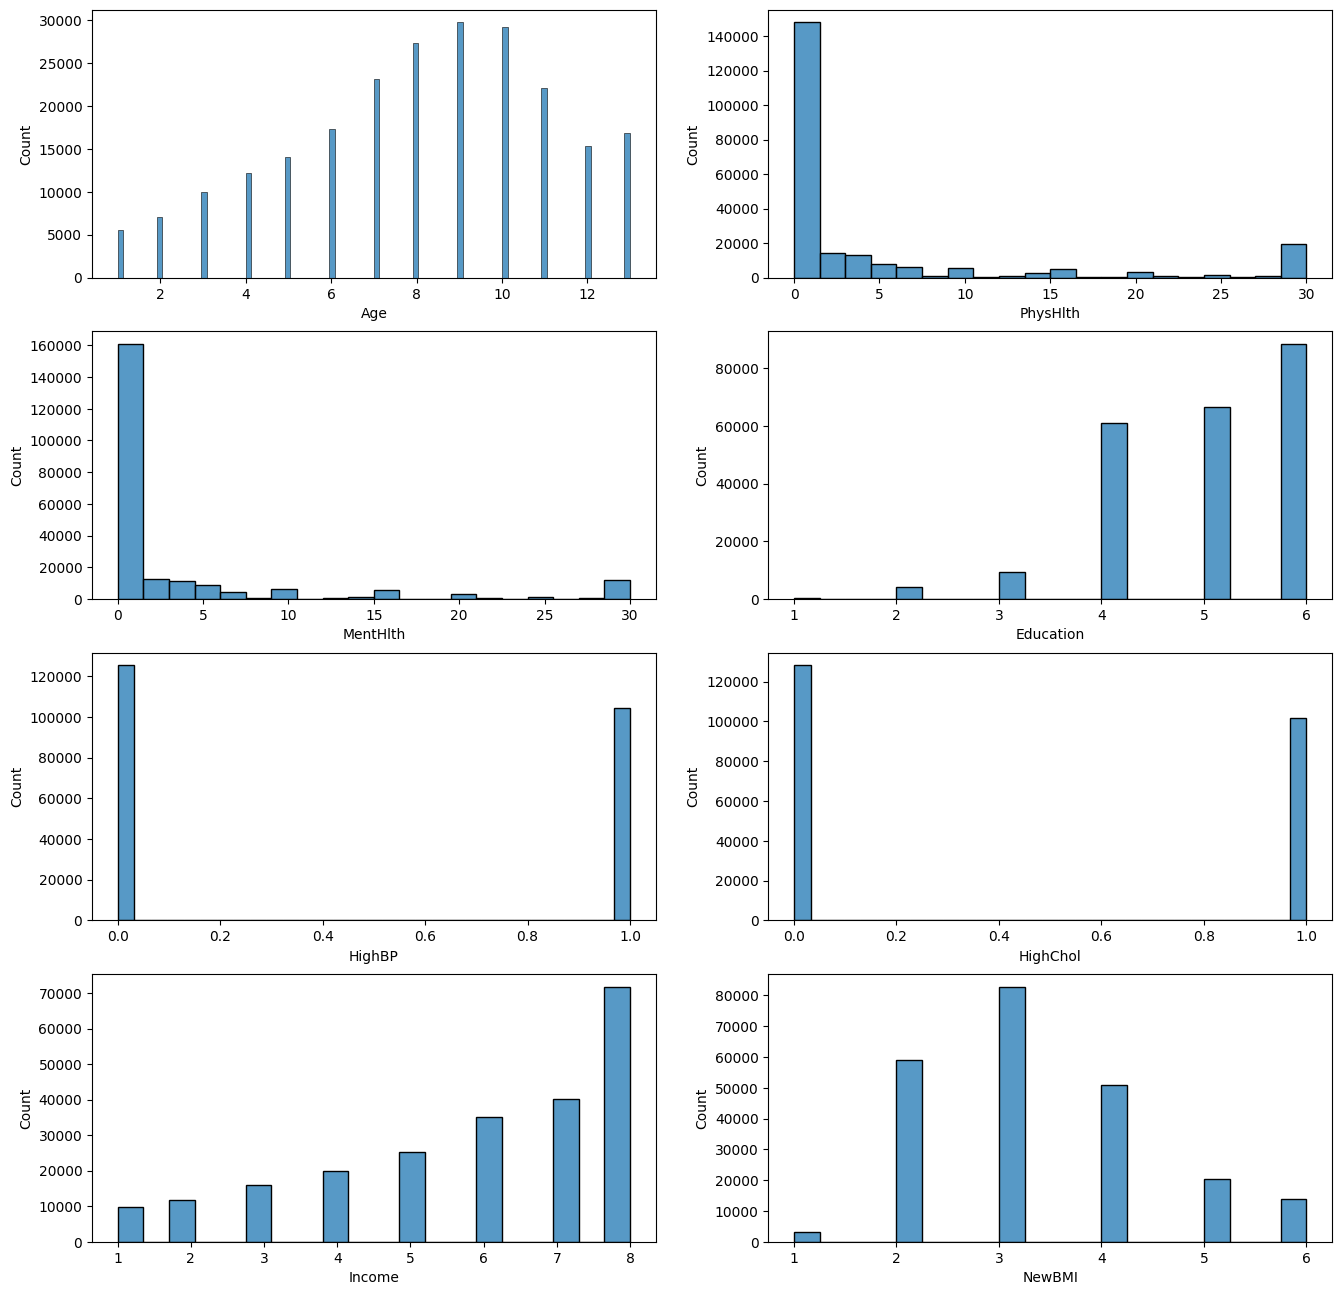

In [221]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(diabetes.Age, ax=ax[0,0]) 
sns.histplot(diabetes.PhysHlth, bins = 20, ax=ax[0,1]) 
sns.histplot(diabetes.MentHlth, bins = 20, ax=ax[1,0]) 
sns.histplot(diabetes.Education, bins = 20, ax=ax[1,1]) 
sns.histplot(diabetes.HighBP, ax=ax[2,0])
sns.histplot(diabetes.HighChol, ax=ax[2,1])
sns.histplot(diabetes.Income, bins = 20, ax=ax[3,0]) 
sns.histplot(diabetes.NewBMI, bins = 20, ax=ax[3,1]) 


In [232]:
target = diabetes['Diabetes_012']
features = diabetes.drop(['Diabetes_012'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

Text(0, 0.5, 'Diabetes_012')

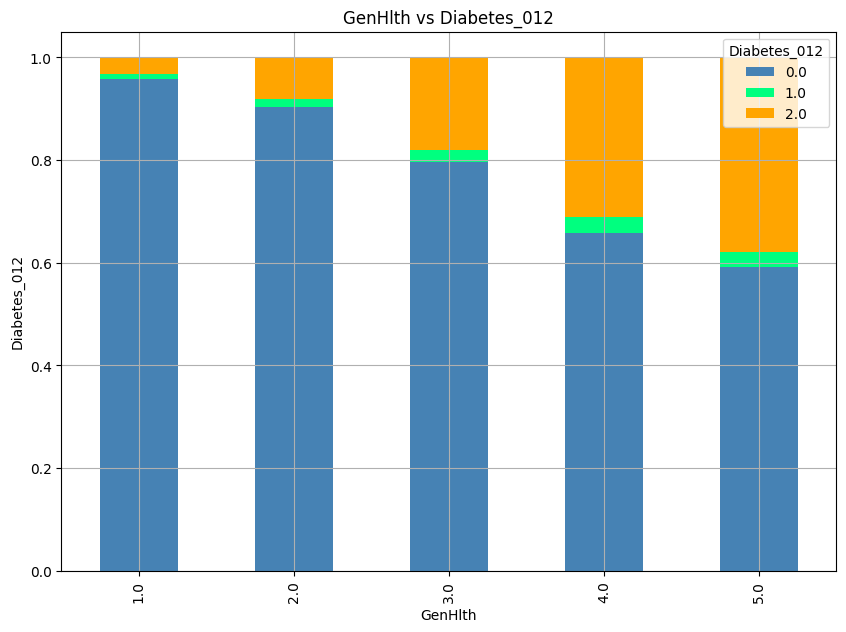

In [223]:
categorysubtype_diabetes = pd.crosstab(features['GenHlth'], target)
categorysubtype_diabetes_pct = categorysubtype_diabetes.div(categorysubtype_diabetes.sum(1).astype(float), axis=0)
categorysubtype_diabetes_pct.plot(figsize= (10,7), kind='bar', stacked=True, color=['steelblue', 'springgreen','orange'], title='GenHlth vs Diabetes_012', grid=True)
plt.xlabel('GenHlth')
plt.ylabel('Diabetes_012')

Text(0, 0.5, 'Diabetes_012')

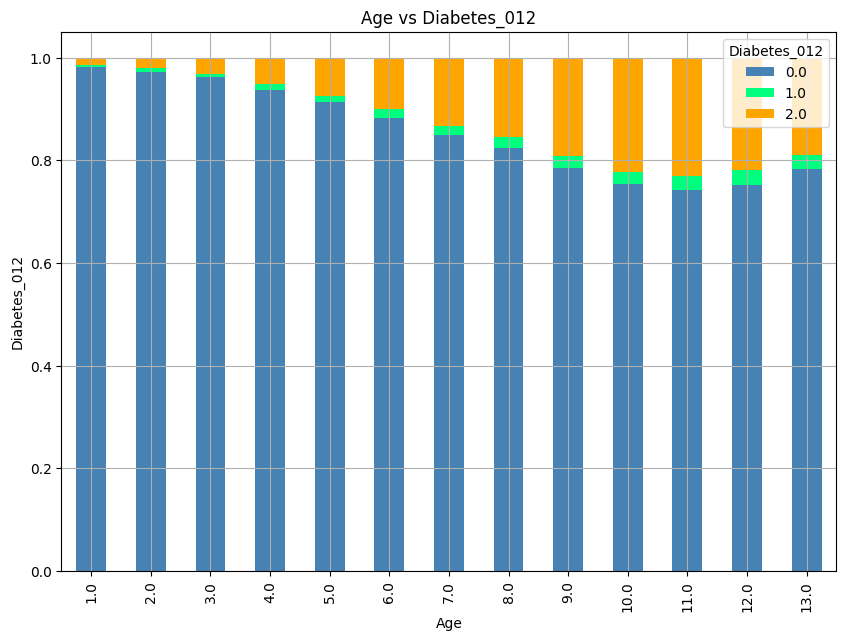

In [224]:
categorysubtype_diabetes = pd.crosstab(features['Age'], target)
categorysubtype_diabetes_pct = categorysubtype_diabetes.div(categorysubtype_diabetes.sum(1).astype(float), axis=0)
categorysubtype_diabetes_pct.plot(figsize= (10,7), kind='bar', stacked=True, color=['steelblue', 'springgreen','orange'], title='Age vs Diabetes_012', grid=True)
plt.xlabel('Age')
plt.ylabel('Diabetes_012')

Text(0, 0.5, 'Diabetes_012')

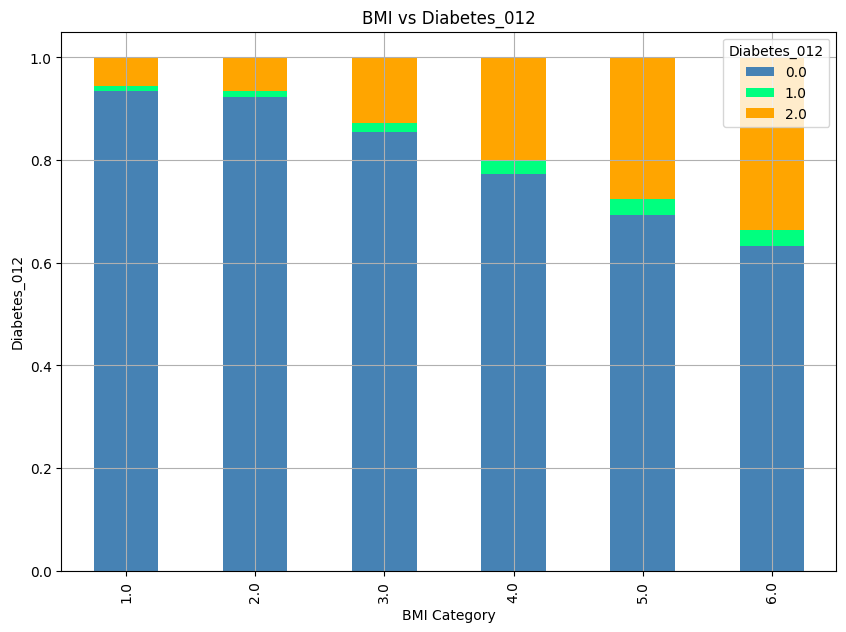

In [225]:
categorysubtype_diabetes = pd.crosstab(features['NewBMI'], target)
categorysubtype_diabetes_pct = categorysubtype_diabetes.div(categorysubtype_diabetes.sum(1).astype(float), axis=0)
categorysubtype_diabetes_pct.plot(figsize= (10,7), kind='bar', stacked=True, color=['steelblue', 'springgreen','orange'], title='BMI vs Diabetes_012', grid=True)
plt.xlabel('BMI Category')
plt.ylabel('Diabetes_012')

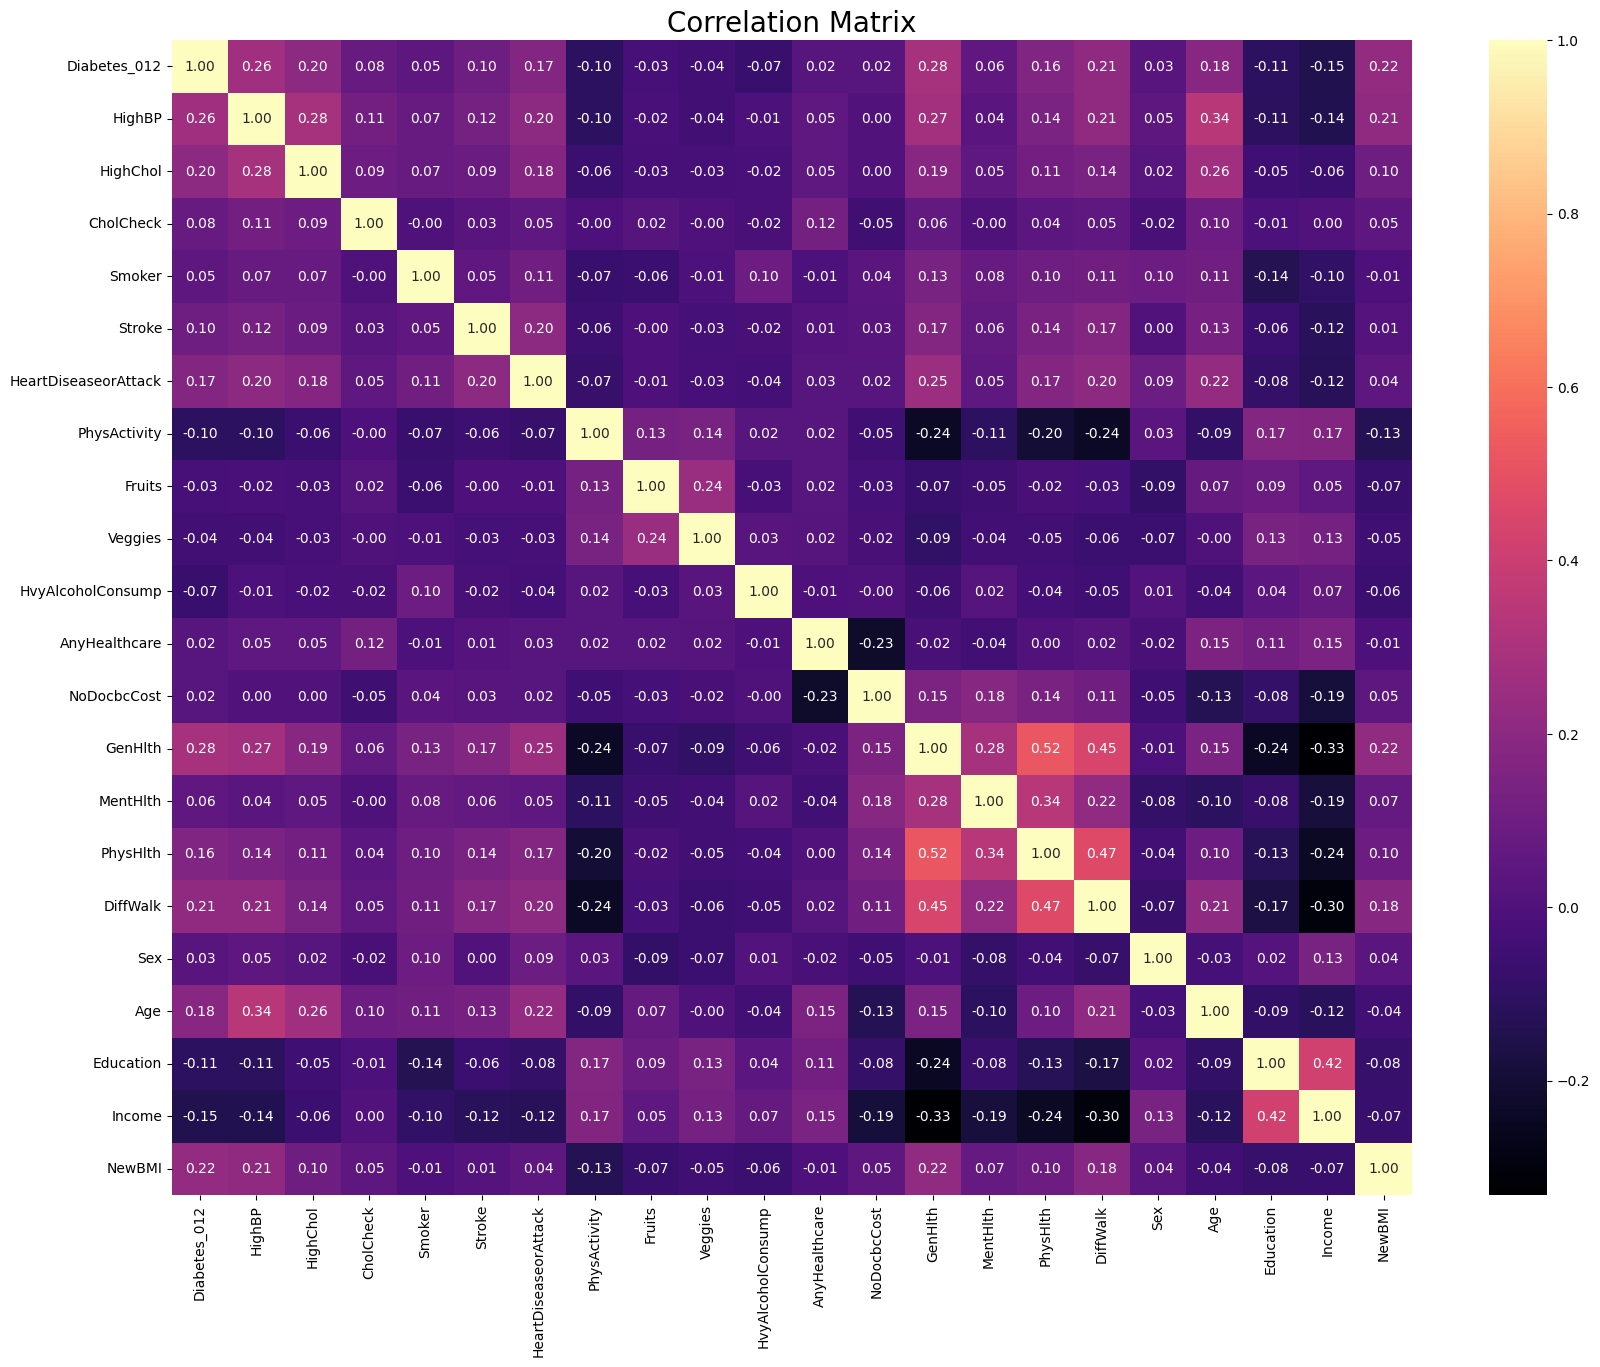

In [226]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(diabetes.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Model Training

**LDA**

In [233]:
# Create and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lda = lda.predict(X_test)
y_pred_lda_train = lda.predict(X_train)
# Calculate accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_lda_train = accuracy_score(y_train, y_pred_lda_train)
print(f"LDA Accuracy on training data: {accuracy_lda}")
print(f"LDA Accuracy on testing data: {accuracy_lda_train}")

LDA Accuracy on training data: 0.8328655047109255
LDA Accuracy on testing data: 0.8316052310906084


**QDA**

In [234]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions on the test set
y_pred_qda = qda.predict(X_test)
y_pred_qda_train = qda.predict(X_train)
# Calculate accuracy
accuracy_qda = accuracy_score(y_test, y_pred_qda)
accuracy_qda_train = accuracy_score(y_train, y_pred_qda_train)
print(f"QDA Accuracy on Training data: {accuracy_qda_train}")
print(f"QDA Accuracy on testing data: {accuracy_qda}")


QDA Accuracy on Training data: 0.7405126642875794
QDA Accuracy on testing data: 0.7436081554496594


**KNN**

In [236]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier() 
knn.fit(X_train_scaled, y_train)

# Make predictions on the standardized test set
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn_train = knn.predict(X_train_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print(f"KNN Accuracy on training data: {accuracy_knn_train}")
print(f"KNN Accuracy on testing data: {accuracy_knn}")


KNN Accuracy on training data: 0.856754286709026
KNN Accuracy on testing data: 0.8147833844680897


**Comparison**

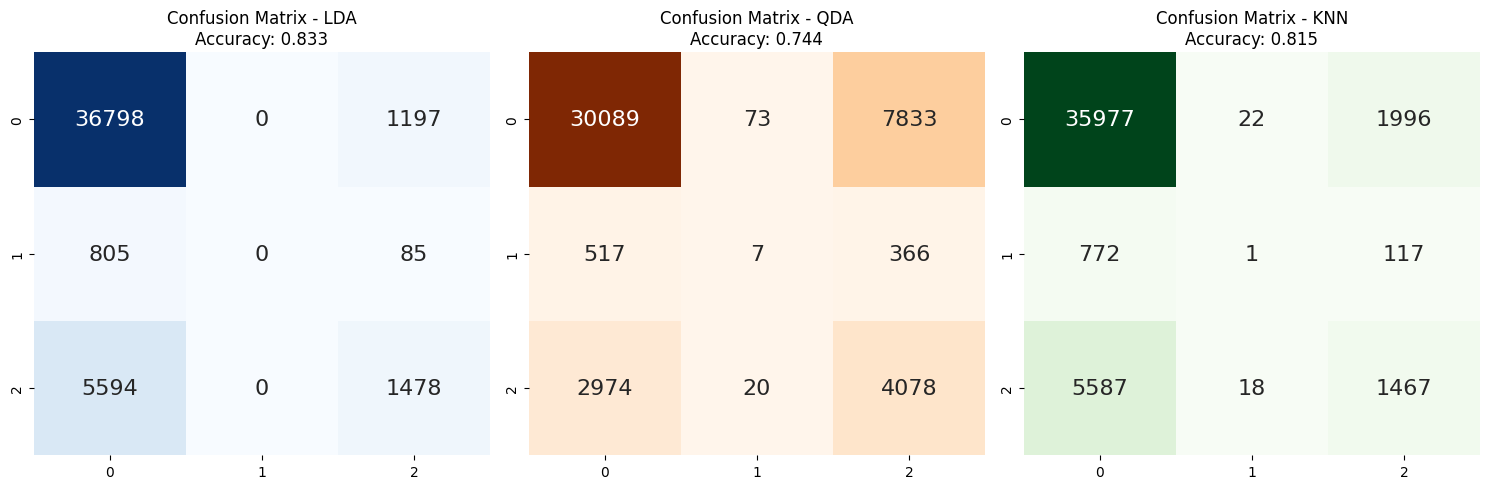

In [237]:
# Confusion matrix for LDA
cm_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# Confusion matrix for QDA
cm_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Plotting the confusion matrix using heatmap with accuracy
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title(f"Confusion Matrix - LDA\nAccuracy: {accuracy_lda:.3f}")

plt.subplot(1, 3, 2)
sns.heatmap(cm_qda, annot=True, fmt="d", cmap="Oranges", cbar=False, annot_kws={"size": 16})
plt.title(f"Confusion Matrix - QDA\nAccuracy: {accuracy_qda:.3f}")

plt.subplot(1, 3, 3)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", cbar=False, annot_kws={"size": 16})
plt.title(f"Confusion Matrix - KNN\nAccuracy: {accuracy_knn:.3f}")

plt.tight_layout()
plt.show()

# Task 4

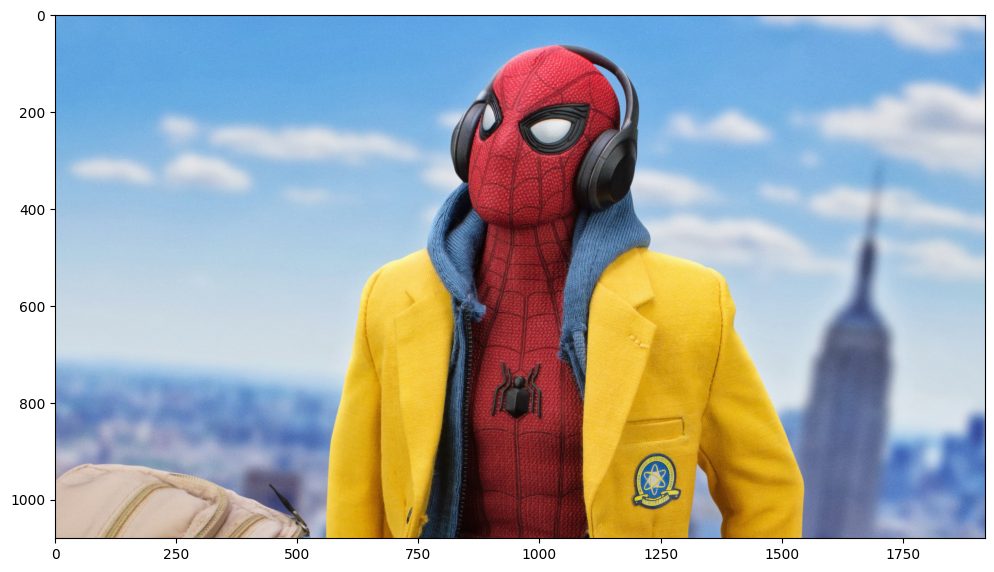

In [238]:
plt.figure(figsize=(12,10))
image=plt.imread('Image2.jpg')
plt.imshow(image)

In [239]:
image.shape

(1080, 1920, 3)

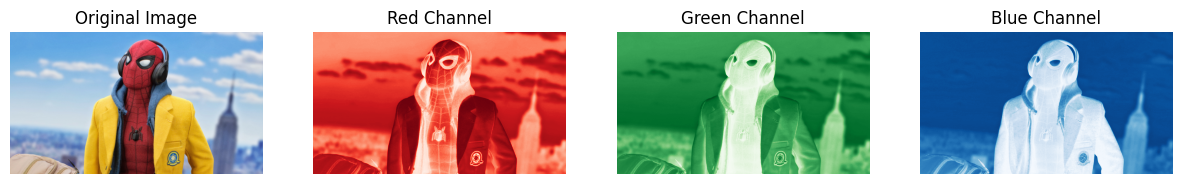

In [240]:
r=image[:,:,0]
g=image[:,:,1]
b=image[:,:,2]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Display the original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the individual color channels
axes[1].imshow(r, cmap='Reds')
axes[1].set_title("Red Channel")
axes[1].axis('off')

axes[2].imshow(g, cmap='Greens')
axes[2].set_title("Green Channel")
axes[2].axis('off')

axes[3].imshow(b, cmap='Blues')
axes[3].set_title("Blue Channel")
axes[3].axis('off')

plt.show()

In [241]:
image_array = np.array(image)
image_array = image_array / 255

In [242]:
# Main function to compress an image to given percentage
def compress_svd_by_percentage(image_array, percentage):
  # Extract individual channels
  image_r = image_array[:,:,0]
  image_g = image_array[:,:,1]
  image_b = image_array[:,:,2]

  # SVDs of individual channels
  u_r, d_r, v_r = np.linalg.svd(image_r, full_matrices=True)
  u_g, d_g, v_g = np.linalg.svd(image_g, full_matrices=True)
  u_b, d_b, v_b = np.linalg.svd(image_b, full_matrices=True)

  # Calculate minimum rank to retain percentage of data
  def calculate_min_rank(d):
    sum = np.sum(d)
    sumr = d[0]
    for r in range(1, len(d)):
      if sumr / sum >= percentage:
        break
      sumr += d[r]

    return r

  rank_r = calculate_min_rank(d_r)
  rank_g = calculate_min_rank(d_g)
  rank_b = calculate_min_rank(d_b)
  print(f"Corresponding ranks are red: {rank_r}, green: {rank_g}, blue: {rank_b}")

  # Apply compression
  u_r_k = u_r[:, 0:rank_r]
  u_g_k = u_g[:, 0:rank_g]
  u_b_k = u_b[:, 0:rank_b]

  v_r_k = v_r[0:rank_r, :]
  v_g_k = v_g[0:rank_g, :]
  v_b_k = v_b[0:rank_b, :]

  d_r_k = d_r[0:rank_r]
  d_g_k = d_g[0:rank_g]
  d_b_k = d_b[0:rank_b]

  # Reconstruct the channels
  compressed_red = np.dot(u_r_k, np.dot(np.diag(d_r_k), v_r_k))
  compressed_green = np.dot(u_g_k, np.dot(np.diag(d_g_k), v_g_k))
  compressed_blue = np.dot(u_b_k, np.dot(np.diag(d_b_k), v_b_k))

  # Reconstruct the compressed image and clip values between 0 and 1
  compressed_image = np.stack([compressed_red, compressed_green, compressed_blue], axis=-1)
  compressed_image[compressed_image < 0] = 0
  compressed_image[compressed_image > 1] = 1

  return compressed_image


In [243]:
# Compression levels (10%, 40%, 85%)
compression_levels = [0.1, 0.4, 0.85]

In [244]:
# Display the compressed images
compressed_images = []

for percentage in compression_levels:
    compressed_image = compress_svd_by_percentage(image_array, percentage)
    compressed_images.append(compressed_image)

Corresponding ranks are red: 1, green: 1, blue: 1
Corresponding ranks are red: 4, green: 3, blue: 3
Corresponding ranks are red: 297, green: 326, blue: 301


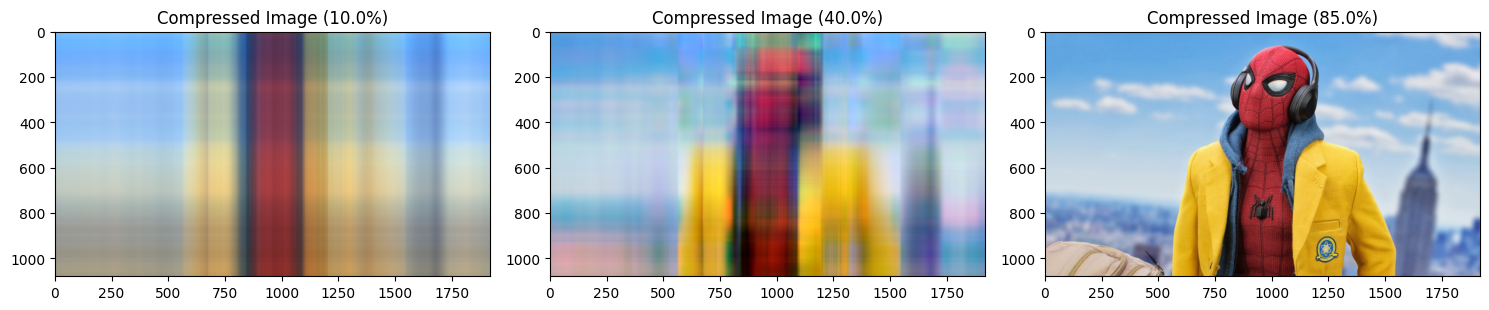

In [245]:
fig = plt.figure(figsize=(5 * 3, 5))
for i, (percentage, compressed_image) in enumerate(zip(compression_levels, compressed_images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(compressed_image)
    plt.title(f'Compressed Image ({percentage * 100}%)')
    
plt.tight_layout()
plt.show()
